In [48]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

# monkey patches visualization and provides helpers to load geometries
sys.path.append('Open3D-master/examples/python/')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

In [35]:
# Load in color and depth image to create the point cloud
print("Read Redwood dataset")
color_raw = o3d.io.read_image("colorImg.jpg")
depth_raw = o3d.io.read_image("depthImg.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


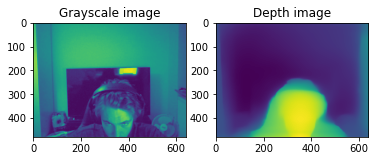

In [36]:
# Plot the images
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [37]:
# Camera intrinsic parameters built into Open3D for Prime Sense
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

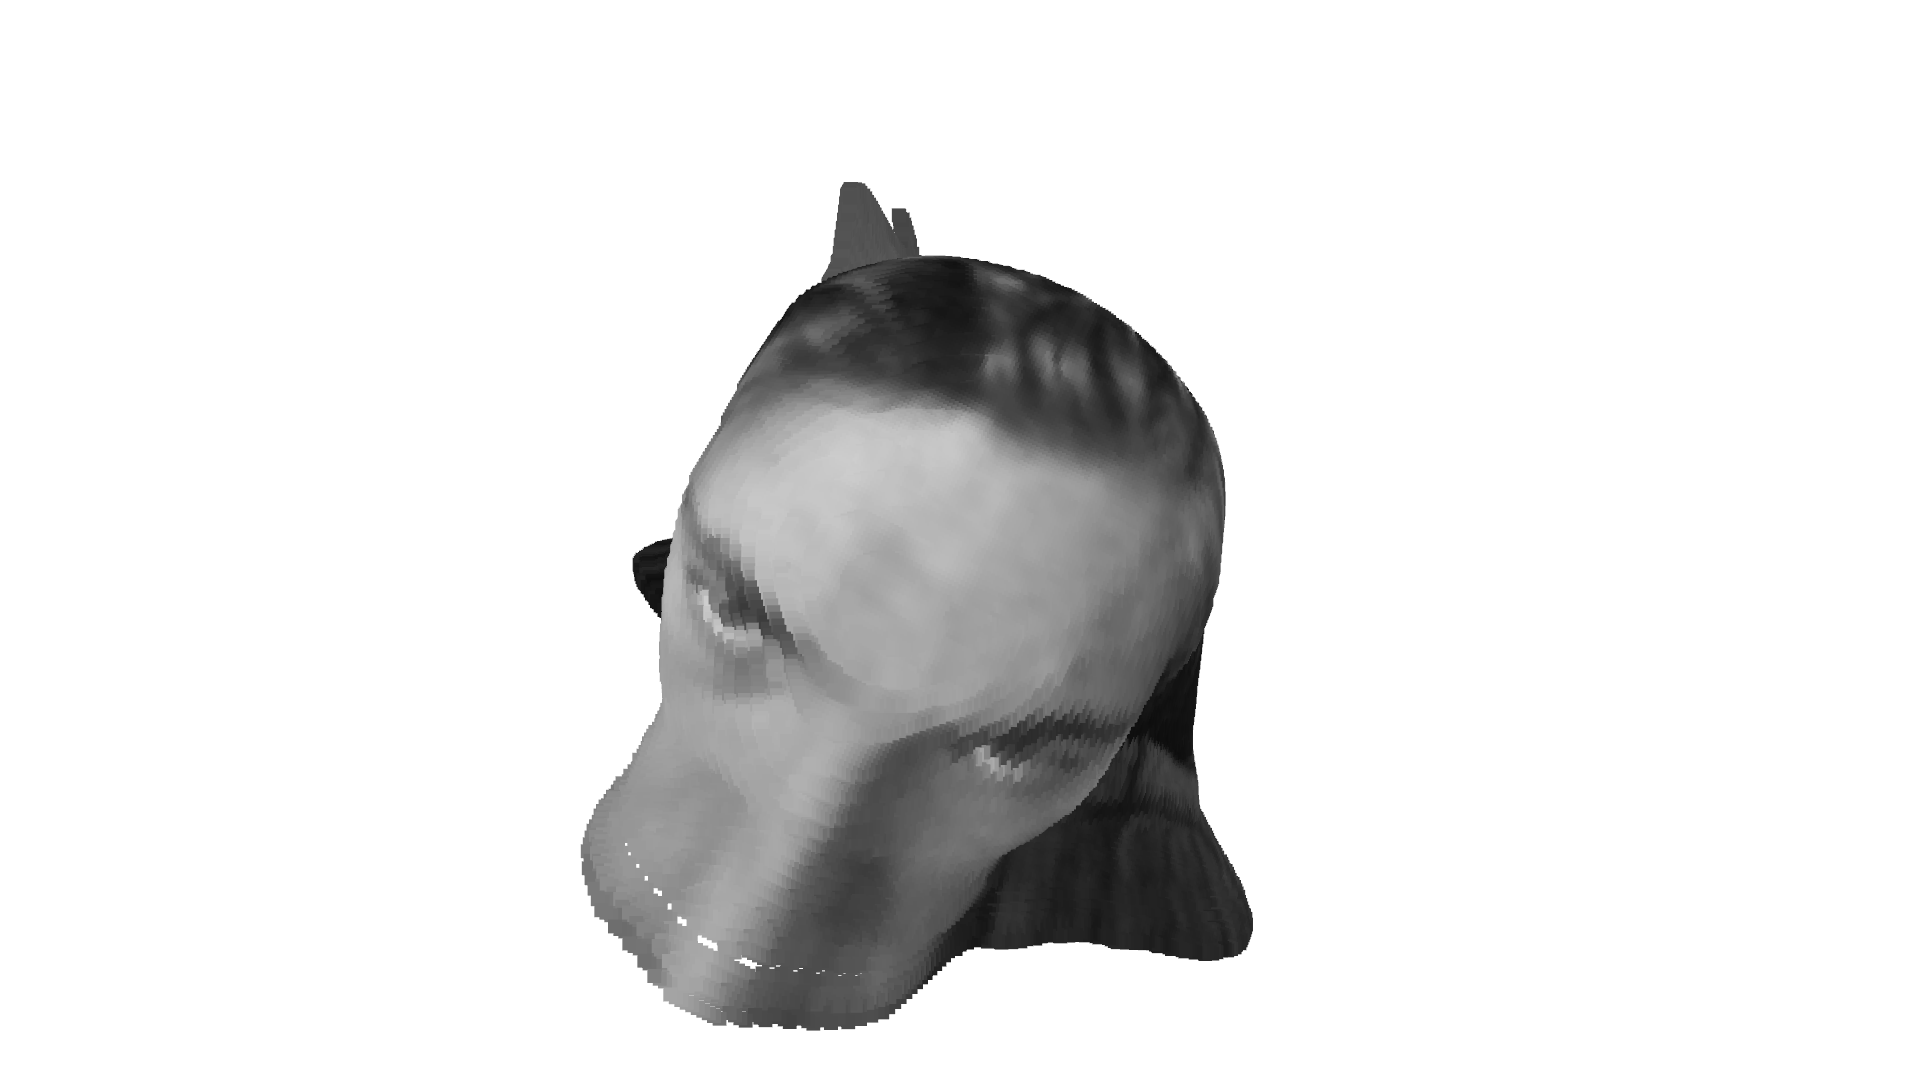

In [47]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)

In [50]:
# Camera intrinsic parameters from camera used to get color and depth images - Camera Calibration
cv_file = cv2.FileStorage()
cv_file.open('C:/Users/nhoei/ComputerVision/monocularDepth/cameraIntrinsic.xml', cv2.FileStorage_READ)

camera_intrinsic = cv_file.getNode('intrinsic').mat()
print(camera_intrinsic)

[[772.10272217   0.         327.05437423]
 [  0.         773.78594971 231.15509522]
 [  0.           0.           1.        ]]


In [54]:
# Set the intrinsic camera parameters
camera_intrinsic_o3d = o3d.camera.PinholeCameraIntrinsic(width=640, height=480, fx=camera_intrinsic[0][0],fy=camera_intrinsic[1][1], cx=camera_intrinsic[0][2], cy=camera_intrinsic[1][2])
print(camera_intrinsic_o3d.intrinsic_matrix)

[[772.10272217   0.         327.05437423]
 [  0.         773.78594971 231.15509522]
 [  0.           0.           1.        ]]


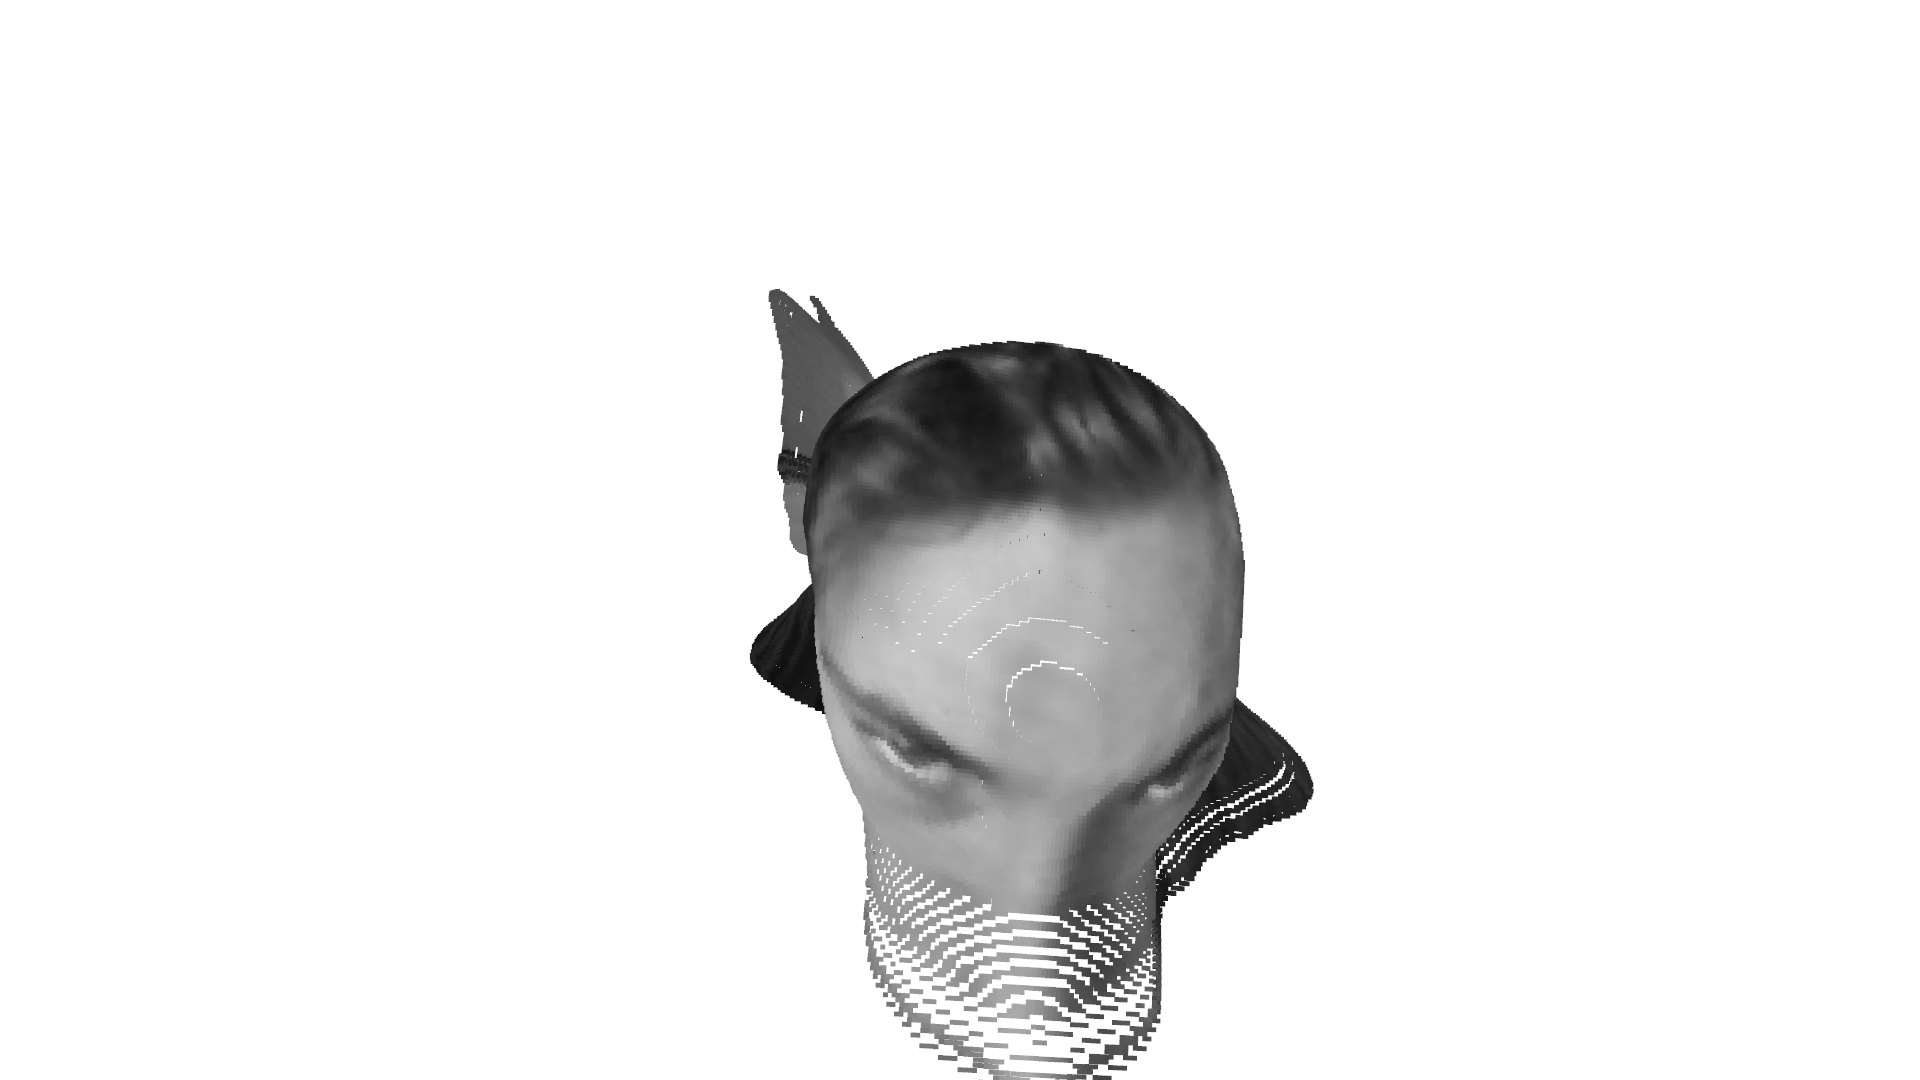

In [55]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic_o3d)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)

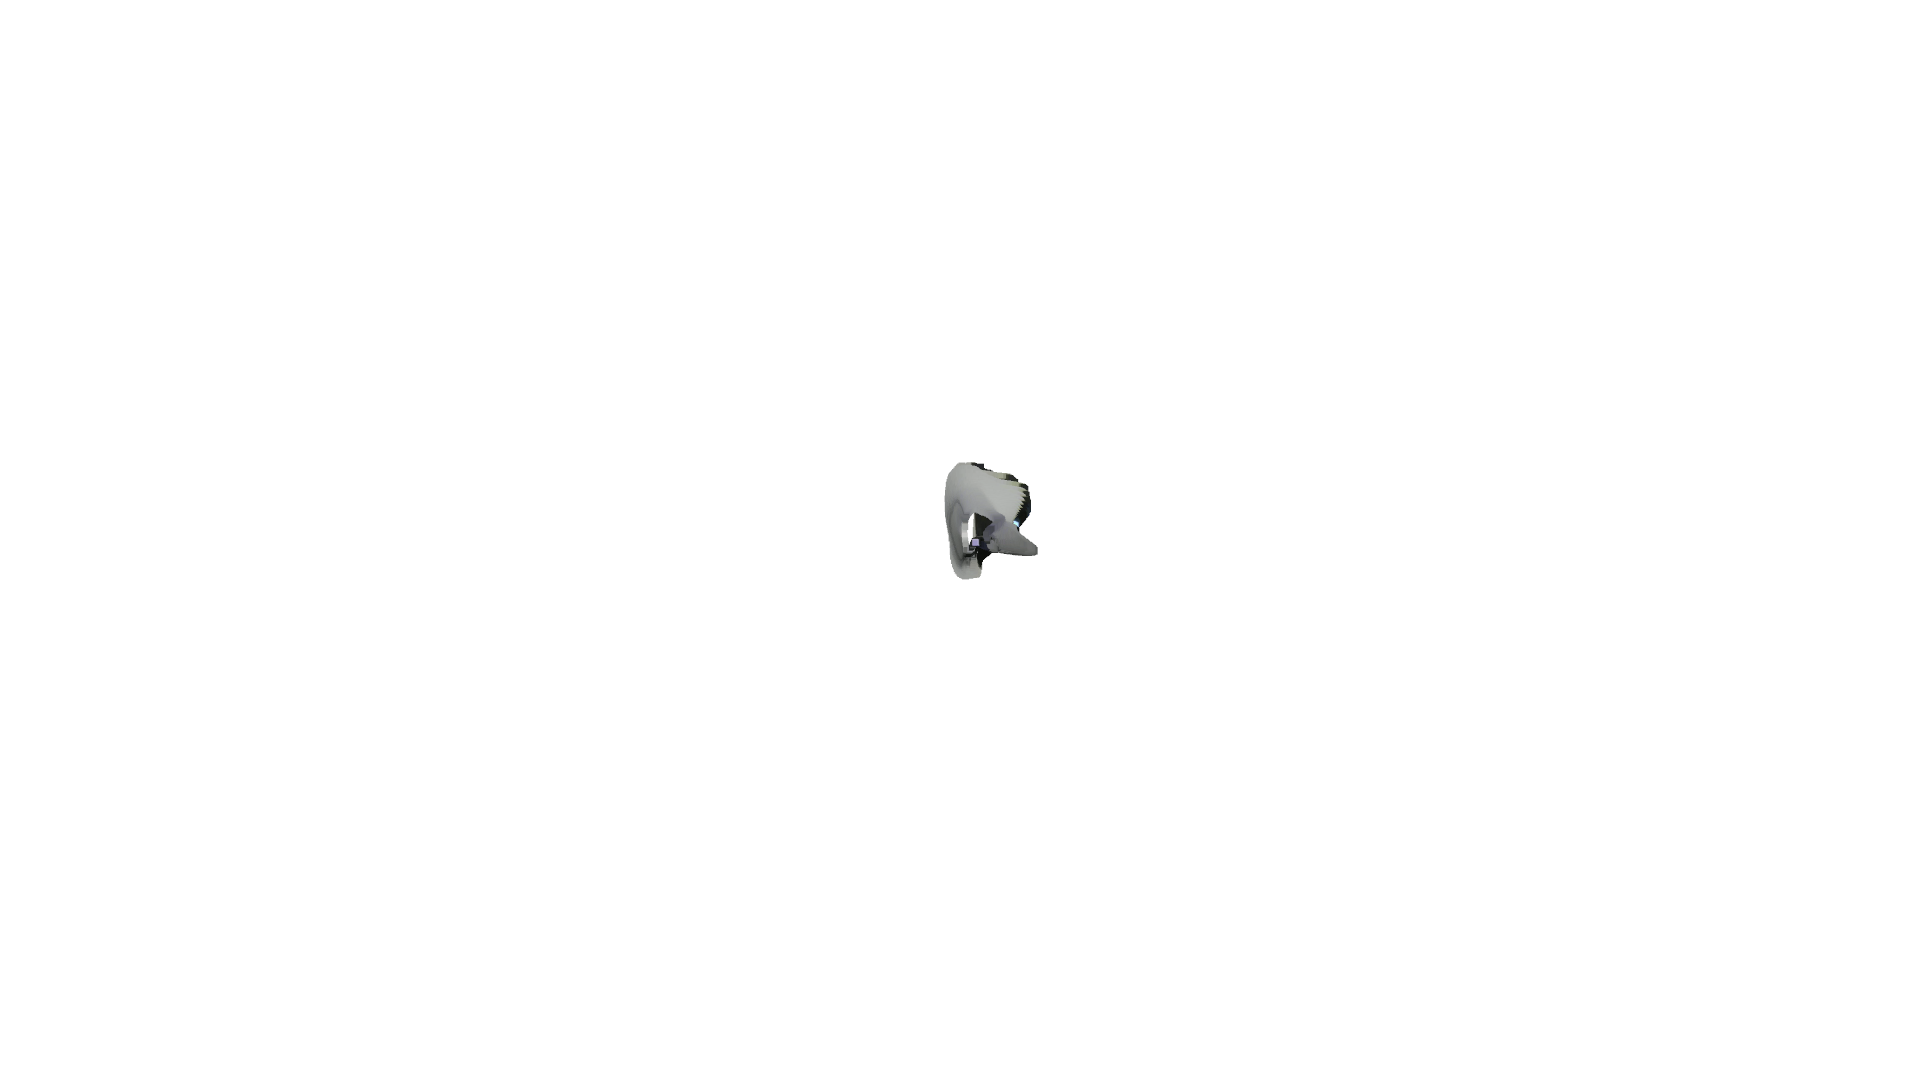

In [56]:
# Load in the point cloud created from OpenCV to compared to Open3D
opencv_pcd_path = "C:/Users/nhoei/ComputerVision/monocularDepth/reconstructedMono.ply"
pcd = o3d.io.read_point_cloud(opencv_pcd_path)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)